In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()


### 1. Load measured metrics

In [2]:
measurements_df = pd.DataFrame(pd.read_json('./results/metrics_contrastive_explanations.json', typ='dictionary')).reset_index()
measurements_df = measurements_df.rename({"index": "metric", 0: "value"}, axis=1)
measurements_df["measurement type"] = "Yin et al."
measurements_df.head()

,metric,value,measurement type
0,mean dot product - gradient norm,0.338258,Yin et al.
1,mean probes needed - gradient norm,2.501773,Yin et al.
2,mean reciprocal rank - gradient norm,0.595702,Yin et al.
3,mean dot product - input x gradient,-0.023138,Yin et al.
4,mean probes needed - input x gradient,2.624597,Yin et al.


### 2. Define original metrics computed by authors

In [3]:
original_measurements = {
    "mean dot product - gradient norm": 0.5,
    "mean probes needed - gradient norm": 1.5,
    "mean reciprocal rank - gradient norm": 0.6,
    "mean dot product - input x gradient": 0.15,
    "mean probes needed - input x gradient": 1.26,
    "mean reciprocal rank - input x gradient": 0.64,
    "mean dot product - input erasure": 0.27,
    "mean probes needed - input erasure": 1.18,
    "mean reciprocal rank - input erasure": 0.65,
}
original_measurements_df = pd.DataFrame(original_measurements, range(9))[:1].T.reset_index()
original_measurements_df = original_measurements_df.rename({"index": "metric", 0: "value"}, axis=1)
original_measurements_df["measurement type"] = "ours"
original_measurements_df.head()

,metric,value,measurement type
0,mean dot product - gradient norm,0.50,ours
1,mean probes needed - gradient norm,1.50,ours
2,mean reciprocal rank - gradient norm,0.60,ours
3,mean dot product - input x gradient,0.15,ours
4,mean probes needed - input x gradient,1.26,ours


### 3. Create data frame that contains both data sets

In [4]:
all_measurements_df = pd.concat([measurements_df, original_measurements_df])
measurement_details = all_measurements_df["metric"].map(lambda x : x.split(" - ")).values
metric_names = [measurement_details_[0] for measurement_details_ in measurement_details]
contrastive_method_names = [measurement_details_[1] for measurement_details_ in measurement_details]
all_measurements_df = all_measurements_df.drop(["metric"], axis=1)
all_measurements_df["alignment metric"] = metric_names
all_measurements_df["constrastive explanation"] = contrastive_method_names
all_measurements_df["constrastive explanation"] = all_measurements_df["constrastive explanation"].map(lambda x: x.capitalize())

In [5]:
all_measurements_df

,value,measurement type,alignment metric,constrastive explanation
0,0.338258,Yin et al.,mean dot product,Gradient norm
1,2.501773,Yin et al.,mean probes needed,Gradient norm
2,0.595702,Yin et al.,mean reciprocal rank,Gradient norm
3,-0.023138,Yin et al.,mean dot product,Input x gradient
4,2.624597,Yin et al.,mean probes needed,Input x gradient
5,0.574909,Yin et al.,mean reciprocal rank,Input x gradient
6,0.252683,Yin et al.,mean dot product,Input erasure
7,2.343488,Yin et al.,mean probes needed,Input erasure
8,0.635573,Yin et al.,mean reciprocal rank,Input erasure
0,0.500000,ours,mean dot product,Gradient norm


### 4. Plot comparisons

In [6]:
def plot_metrics_comparison():
    fig, ax = plt.subplots(1, 3)
    fig.set_size_inches(18, 4)
    colors = ["#00BF63", "#E12049"]

    for plot_index, metric_type in enumerate(["mean dot product", "mean probes needed", "mean reciprocal rank"]):
        sns.barplot(
            data=all_measurements_df[
                all_measurements_df["alignment metric"] == metric_type
            ],
            x="constrastive explanation",
            y="value",
            hue="measurement type",
            ax=ax[plot_index],
            palette=colors
        )

        if plot_index != 2:
            ax[plot_index].legend([],[], frameon=False)
        else:
            ax[plot_index].legend(bbox_to_anchor=(1, 0.153))

        ax[plot_index].set_title(metric_type.title())

        if plot_index != 0:
            ax[plot_index].set_ylabel("")

        ax[plot_index].set_xlabel("")

    fig.text(0.51, -0.02, 'Type of contrastive explanation', ha='center')
    plt.show()
    fig.savefig(f"./results/metrics_comparison.png", bbox_inches='tight') 

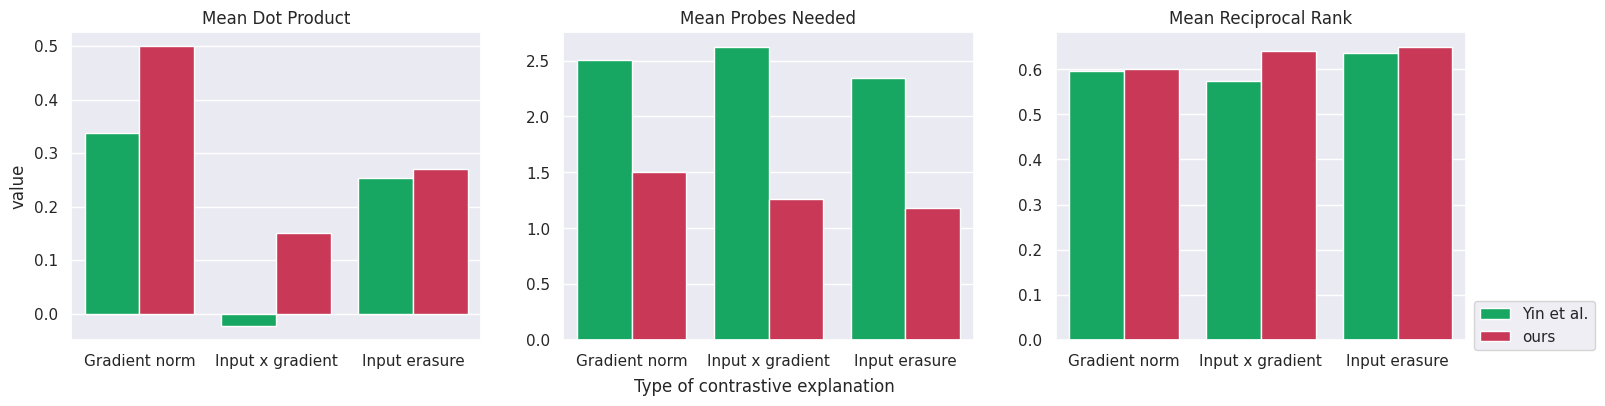

In [7]:
plot_metrics_comparison()